### Dynamic Pricing Using Regression

In [1]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame 
import matplotlib.pyplot as plt 
%matplotlib inline
# plt.style.use('fivethirtyeight')
plt.style.context('fivethirtyeight')
import seaborn as sns 

import statsmodels.api as sm 
from statsmodels.compat import lzip 
from statsmodels.formula.api import ols 

In [4]:
df = pd.read_csv('beef_prices.csv')
df.head()

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000


### 1. Define Profit Function

$profit = revenue - cost$

$revenue = demand_{qt} * price$

$profit = demand_{qt} * price - cost$

### 2. Define Demand Function

need to establish relationship between demand and price based on historical data

$demand_{qt} = f(price)$

this can be estimated using regression modelling 

C:\Users\Erandi_105563\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


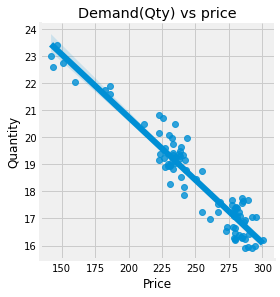

In [5]:
sns.lmplot( x="Price", y="Quantity", data=df, fit_reg=True, size=4)
plt.title('Demand(Qty) vs price')
plt.show()

In [9]:
# fit OLS model 
model = ols("Quantity ~ Price", data=df).fit() 
# print model summary  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           1.69e-46
Time:                        14:19:51   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

### 3. Parameterize the Profit Function

$demand_{qt} = 30.0515−0.0465*price$

$profit = (30.0515−0.0465*price)*price - cost$

### 4. Evaluate the price with maximum profit

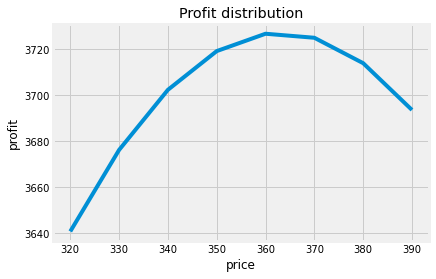

In [10]:
price = [320, 330,340,350, 360, 370, 380, 390] # a range of different prices to find the optimum one 
cost = 80 # a fixed cost in this case 

profit = [] 
for i in price:     
    quantity_demanded=30.05-0.0465*i     
    profit.append((i-cost)*quantity_demanded) # profit function  

#create data frame of price and revenue  
profit_df = pd.DataFrame({"price": price, "profit": profit}) 
#plot revenue against price 
plt.plot(profit_df["price"], profit_df["profit"])
plt.xlabel('price')
plt.ylabel('profit')
plt.title('Profit distribution')
plt.show()

In [11]:
# price at which the revenue is maximum 
profit_df [profit_df['profit'] == profit_df ['profit'].max()]

,price,profit
4,360,3726.8
